<a href="https://colab.research.google.com/github/samanthastaheli/CSE450TeamProjects/blob/main/ZackNeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import datetime

In [56]:
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

new_bikes = bikes.assign(
    date = lambda x: x.dteday.str.split('/'),
    month = lambda x: x.date.str[0].astype(int),
    day = lambda x: x.date.str[1].astype(int),
    year = lambda x: x.date.str[2].astype(int)+2000,
    total = lambda x: x.casual + x.registered,
    # week_day = lambda x: datetime.date(x.year, x.month, x.day).weekday()
)
new_bikes["week_day"] = new_bikes.apply(lambda x: datetime.date(x.year, x.month, x.day).weekday(), axis=1)
new_bikes = pd.get_dummies(new_bikes, columns=["week_day"])
del new_bikes['date']
del new_bikes['dteday']

In [57]:
new_bikes.columns

Index(['season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum',
       'windspeed', 'temp_c', 'feels_like_c', 'casual', 'registered', 'month',
       'day', 'year', 'total', 'week_day_0', 'week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6'],
      dtype='object')

In [58]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = new_bikes.drop(['casual','registered','total'], axis = 1)
y = new_bikes['total'] 

X1, X_test, y1, y_test = train_test_split(X, y, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = .3)

# Scale the data
minmax_scaler = preprocessing.MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train) # fit the scale to the training data
X_test = minmax_scaler.transform(X_test) # use the same scale on the testing data
X_val = minmax_scaler.transform(X_val) # use the same scale on the testing data

In [59]:
# This shows (number of samples, number of features)
# X_val.shape
X_test.shape

(3328, 19)

# Create the model structure

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential() 
model.add(Dense(30, input_dim=19, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(20, activation = 'relu')) 
model.add(Dense(1, activation='linear')) 

model.compile(loss='MSE', optimizer= 'Adam', metrics=['mean_squared_error'])

In [61]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 30)                600       
                                                                 
 dense_54 (Dense)            (None, 50)                1550      
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 50)                2550      
                                                                 
 dense_57 (Dense)            (None, 50)                2550      
                                                                 
 dense_58 (Dense)            (None, 50)                2550      
                                                                 
 dense_59 (Dense)            (None, 50)               

In [63]:
# Train the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 300, verbose = 20)

Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

In [64]:
# Evaluate the model on the training data
_, train_mse = model.evaluate(X_train, y_train, verbose = 1)

# Evaluate the model on the testing data
_, test_mse = model.evaluate(X_test, y_test, verbose = 1)

# Evaluate the model on the validation data
_, test_mse = model.evaluate(X_val, y_val, verbose = 1)

125/125 [==============================] - 0s 2ms/step - loss: 1981.1487 - mean_squared_error: 1981.1487


In [71]:
# Get predictions for the validation data
v_predictions = model.predict(X_val)

# Get the r^2
from sklearn.metrics import r2_score
r2 = r2_score(y_val, v_predictions)
print(r2)

0.9397694269322981


In [72]:
# Get predictions for the testing data
t_predictions = model.predict(X_test)

# Get the r^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, t_predictions)
print(r2)

0.9383626536821865


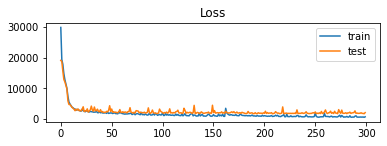

In [67]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

In [98]:
from itertools import chain
import altair as alt

# predictions = []

# for x in v_predictions:
#   predictions.append(x[0])
# # alt.Chart()

df = pd.DataFrame(data=t_predictions, columns=['predictions'])
d2 = y_test.to_frame().reset_index()
d2.drop(columns=['index'])
df = pd.concat([df,d2],axis=1)

df = df.assign(
    diff = lambda x: abs(x.predictions - x.total)
)

df

,predictions,index,total,diff
0,97.697929,7472,101,3.302071
1,178.507416,2245,73,105.507416
2,32.801128,15924,40,7.198872
3,67.265190,7591,84,16.734810
4,80.461411,10707,101,20.538589
...,...,...,...,...
3323,128.508759,318,139,10.491241
3324,21.406717,4039,23,1.593283
3325,205.298645,6702,234,28.701355
3326,75.319901,11637,75,0.319901


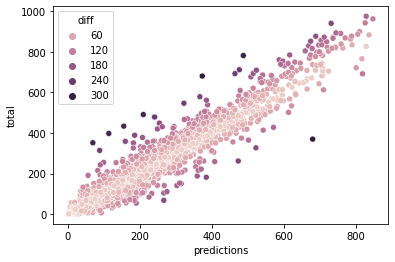

In [99]:
sns.scatterplot(data=df,x='predictions',y='total', hue='diff')

# Create a function and a method to do optimization and hyperparameter tuning


In [68]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [69]:
# # We can make several different models, so let's make a function to make the model

# # Function to create model, required for KerasClassifier / KerasRegressor
# def create_model(optimizer='adam'):
# 	model = Sequential()
# 	model.add(Dense(64, input_dim=12, activation='relu'))
# 	model.add(Dense(1, activation='relu'))
# 	# Compile model
# 	model.compile(loss='MSE', optimizer=optimizer, metrics=['mse'])
# 	return model

# # Let's use the KerasRegressor tool to make the model so that we can pass it to a hyperparameter grid search
# model = KerasRegressor(build_fn=create_model, verbose=0)

# # Define the grid search parameters
# batch_size = [10, 30]
# epochs = [100, 20]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# # Run the grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [70]:
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# Other options than GridSearch

Check out this website for better/other options, besides the Grid or Random search:
https://towardsdatascience.com/hyperparameter-tuning-with-keras-tuner-283474fbfbe

https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/